In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
data_test = pd.read_csv("Airline Passenger satisfaction.csv")

In [50]:
df_test = pd.DataFrame(data_test)

In [51]:
df_test.shape

(25976, 25)

In [52]:
df = pd.concat([df_test], ignore_index=True)

print(df.shape)

(25976, 25)


In [53]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [54]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [55]:
len(df.columns)

25

In [56]:
df = df.drop(columns=['Unnamed: 0', 'id'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [58]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [59]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [60]:
df['Arrival Delay in Minutes'].isnull().sum()

0

In [61]:
df.duplicated().sum()

0

In [62]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

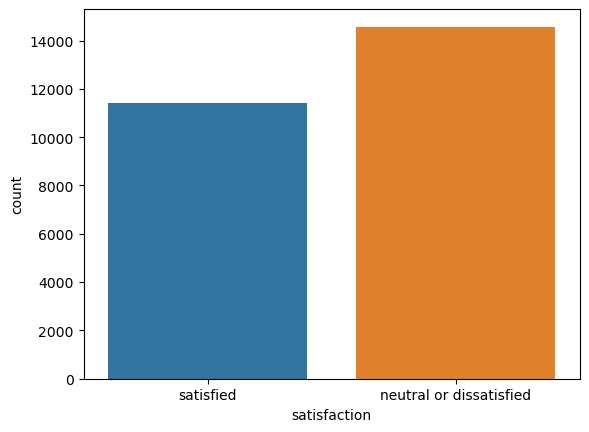

In [63]:
sns.countplot(data=df, x='satisfaction')

<Axes: xlabel='Gender', ylabel='count'>

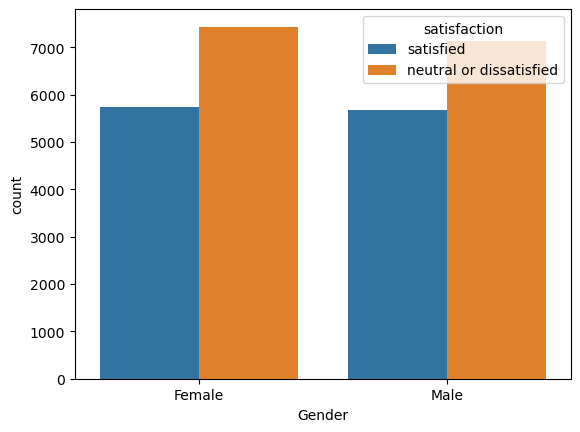

In [64]:
sns.countplot(data=df, x='Gender', hue='satisfaction')

<Axes: xlabel='Type of Travel', ylabel='count'>

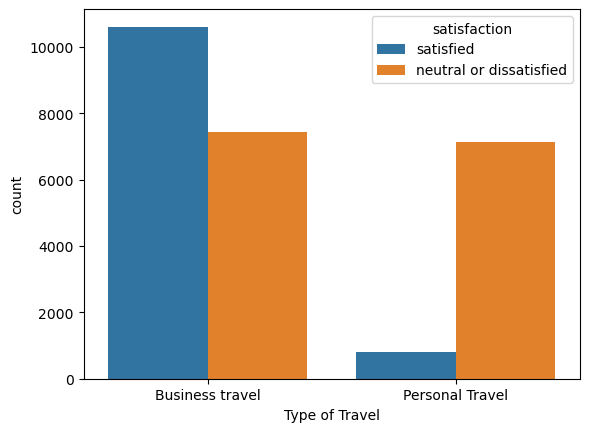

In [65]:
sns.countplot(data=df, x='Type of Travel', hue='satisfaction')

<Axes: xlabel='Ease of Online booking', ylabel='count'>

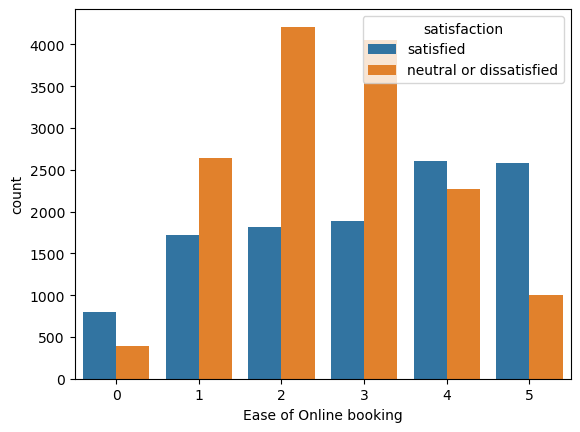

In [66]:
sns.countplot(data=df, x='Ease of Online booking', hue='satisfaction')

<Axes: xlabel='Class', ylabel='count'>

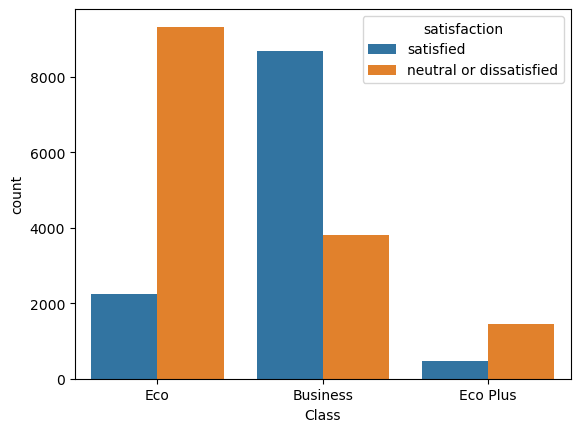

In [67]:
sns.countplot(data=df, x='Class', hue='satisfaction')

<Axes: xlabel='Seat comfort', ylabel='count'>

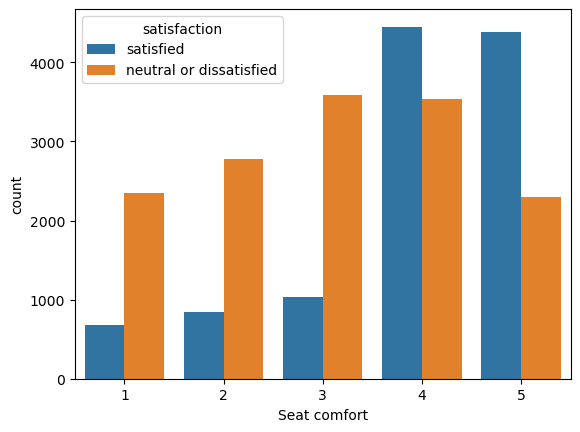

In [68]:
sns.countplot(data=df, x='Seat comfort', hue='satisfaction')

<Axes: xlabel='Leg room service', ylabel='count'>

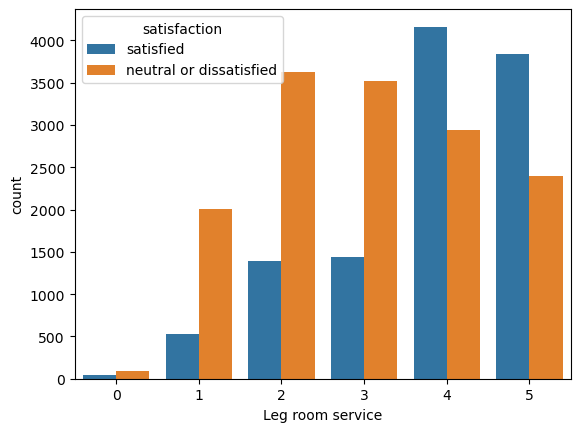

In [69]:
sns.countplot(data=df, x='Leg room service', hue='satisfaction')

<Axes: xlabel='Cleanliness', ylabel='count'>

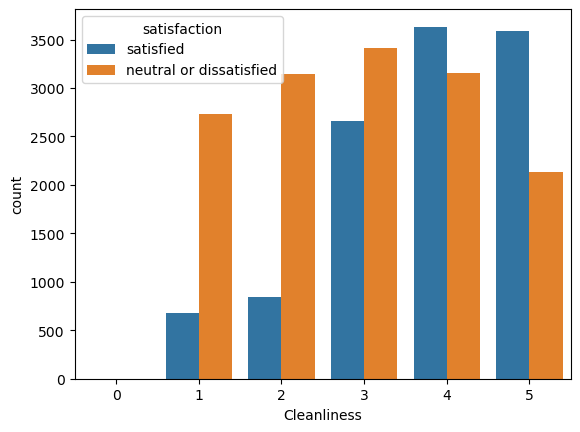

In [70]:
sns.countplot(data=df, x='Cleanliness', hue='satisfaction')

In [71]:
features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes' ]

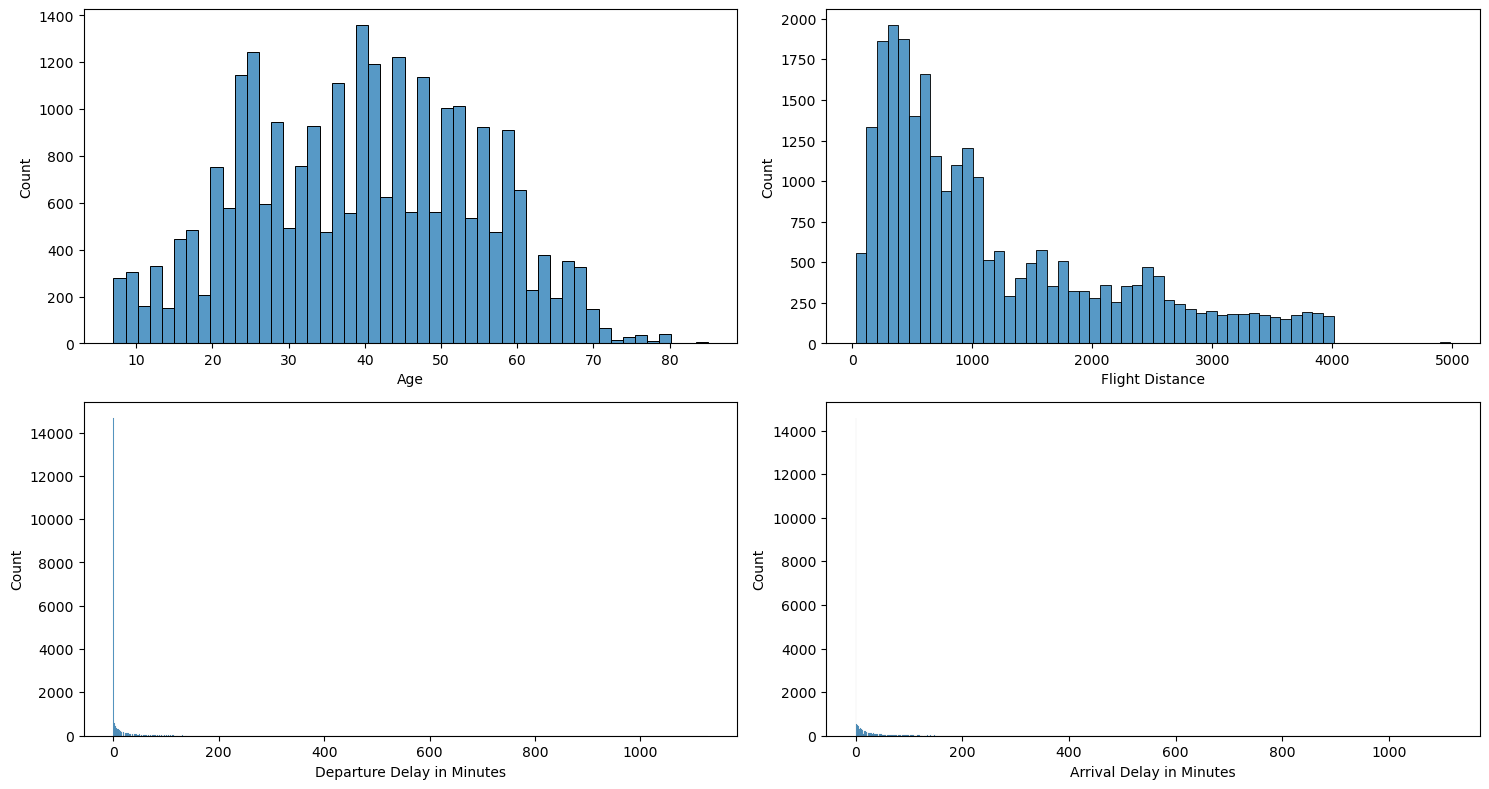

In [72]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
axs = axs.flatten()
for i, f in enumerate(features):
    sns.histplot(data=df, x=f, ax=axs[i])
plt.tight_layout()  
plt.show()

<Axes: xlabel='Departure Delay in Minutes'>

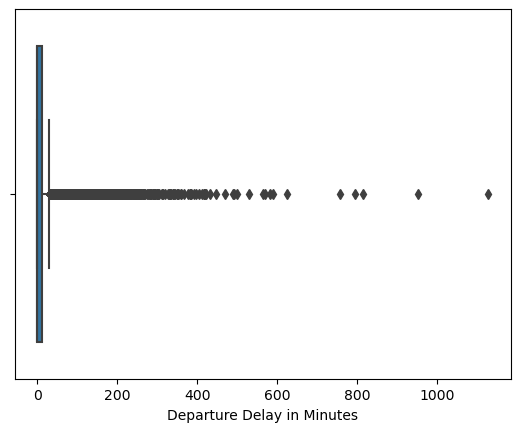

In [73]:
sns.boxplot(data=df, x='Departure Delay in Minutes')

<Axes: xlabel='Arrival Delay in Minutes'>

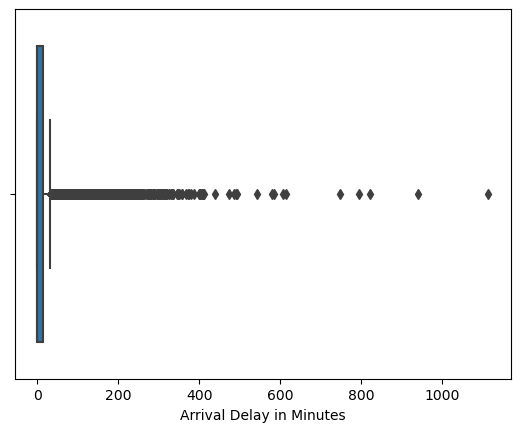

In [74]:
sns.boxplot(data=df, x='Arrival Delay in Minutes')

In [75]:
features = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
index_list = []
for f in features:
    mean = np.mean(df[f])
    std = np.std(df[f])
    z_score = (df[f] - mean)/std
    threshold = 3
    outliers = df[abs(z_score) > threshold]
    index_list.extend(outliers.index)
    print(f"Outliers based on z-scores for feature {f}: ", len(outliers))

Outliers based on z-scores for feature Departure Delay in Minutes:  504
Outliers based on z-scores for feature Arrival Delay in Minutes:  508


In [76]:
df = df.drop(index=index_list).reset_index(drop=True)

In [77]:
df.shape

(25410, 23)

In [78]:
categorical_features = df.select_dtypes(include=['object']).columns

In [79]:
categorical_features

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [80]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in categorical_features:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

<Axes: >

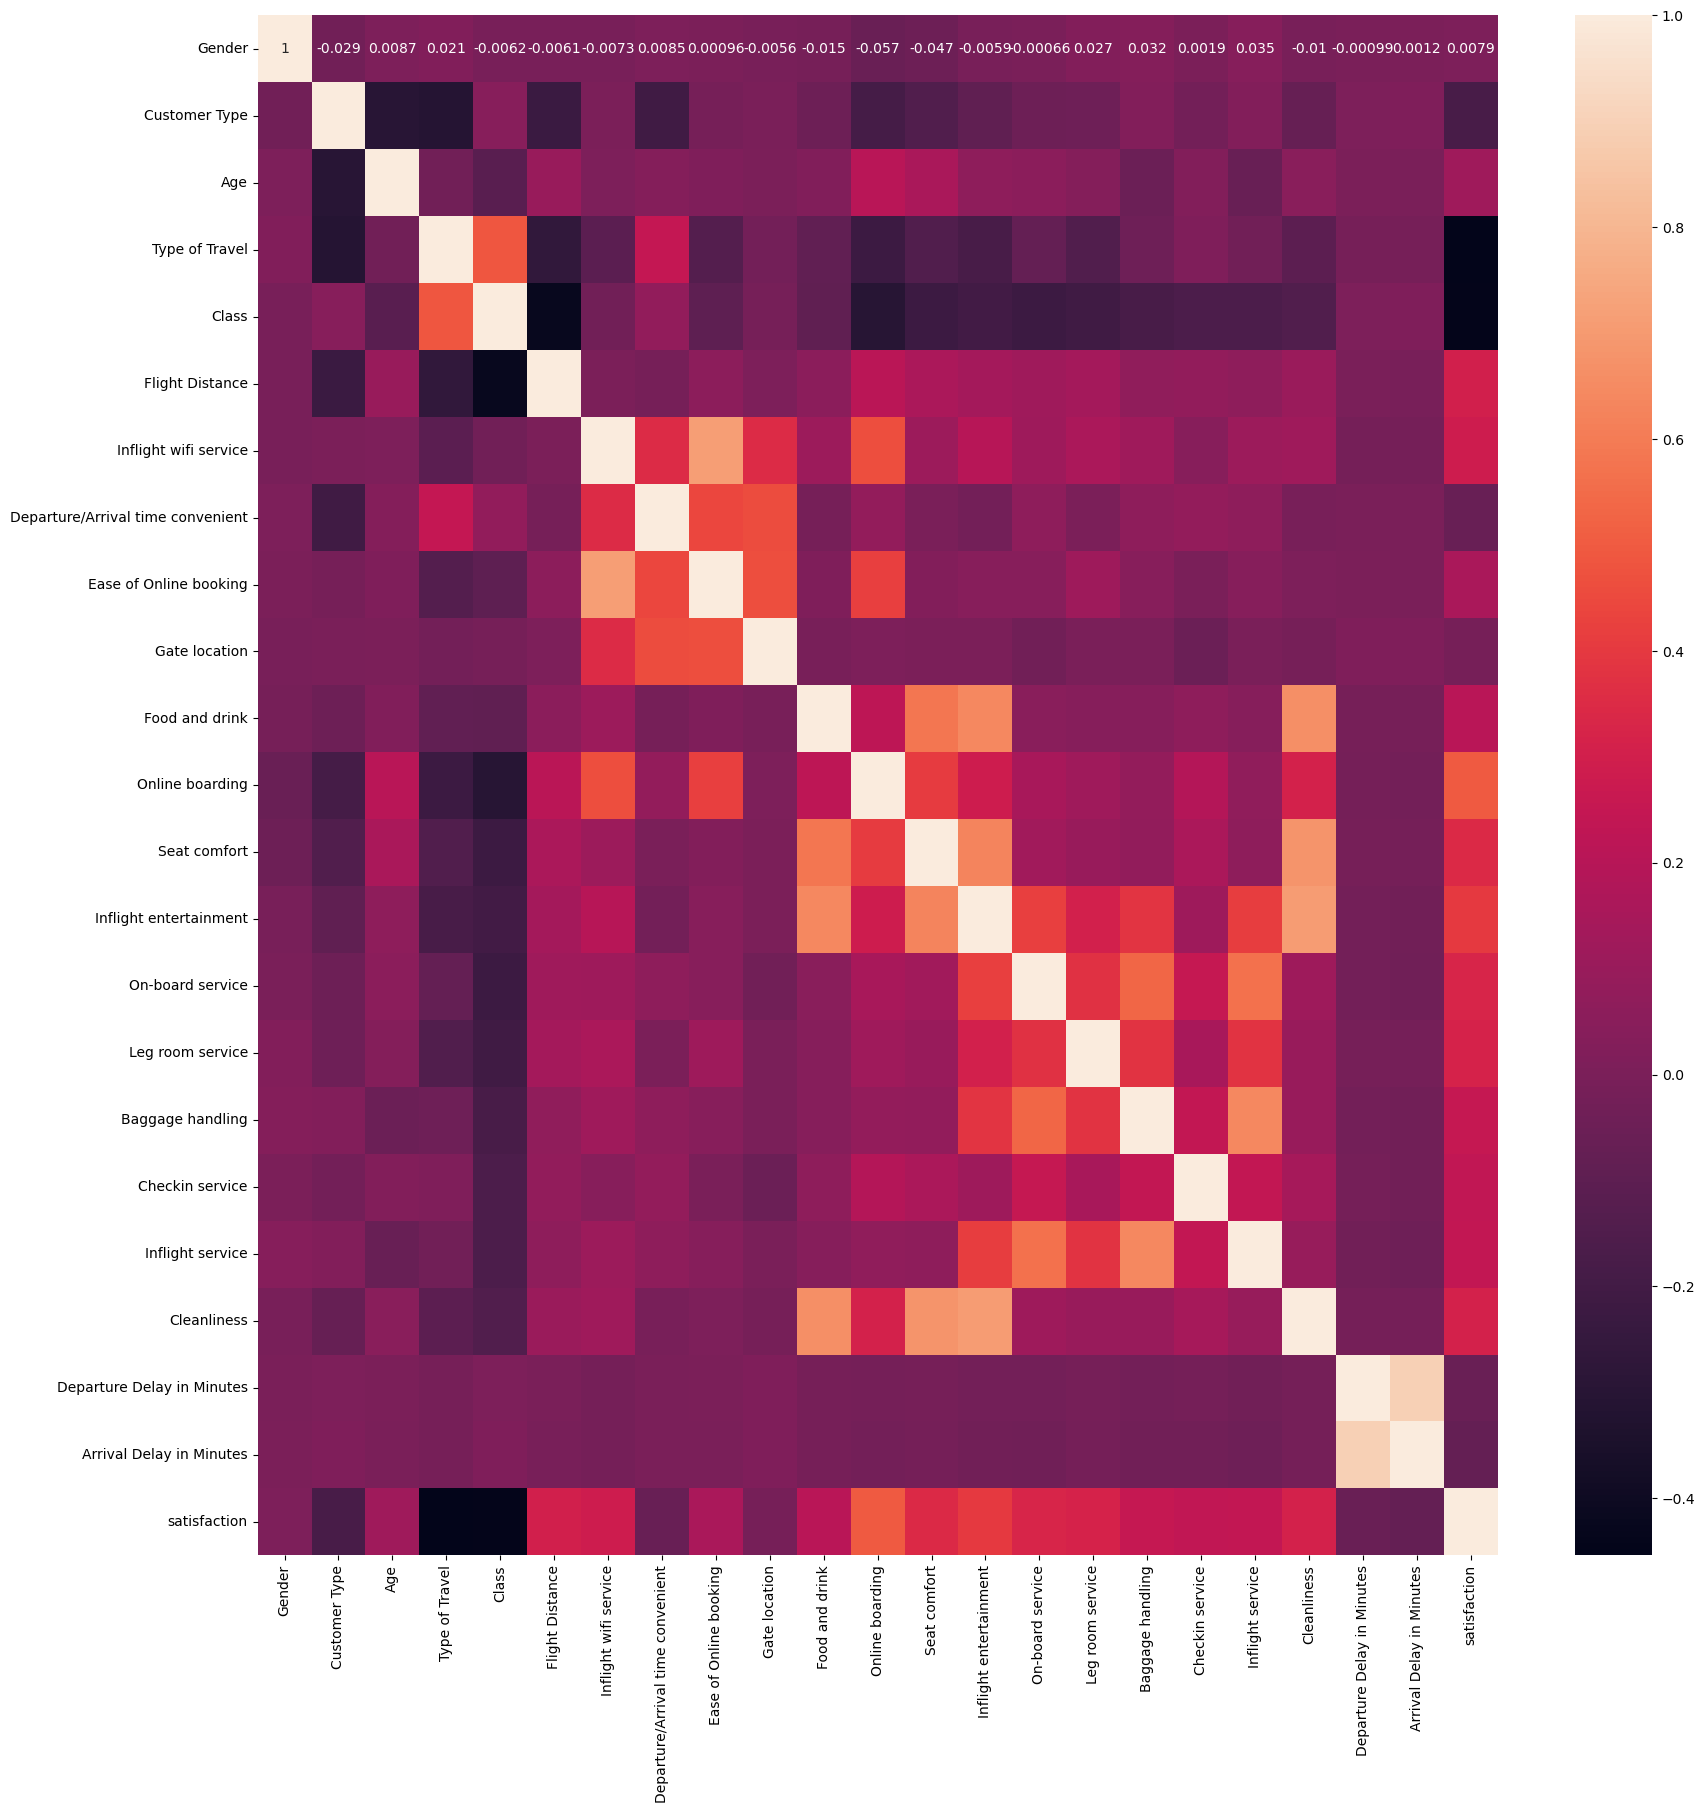

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True)

In [82]:
abs(corr['satisfaction']).sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.495700
Type of Travel                       0.453905
Class                                0.444609
Inflight entertainment               0.402051
Seat comfort                         0.344284
On-board service                     0.326222
Leg room service                     0.313485
Cleanliness                          0.312000
Flight Distance                      0.296349
Inflight wifi service                0.279350
Baggage handling                     0.253575
Inflight service                     0.243490
Checkin service                      0.237244
Food and drink                       0.207413
Customer Type                        0.180975
Ease of Online booking               0.158269
Age                                  0.120568
Arrival Delay in Minutes             0.073582
Departure/Arrival time convenient    0.063712
Departure Delay in Minutes           0.059011
Gate location                     

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [84]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, shuffle=True)

In [86]:
from sklearn.preprocessing import StandardScaler
std =  StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [87]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [88]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [89]:
model_lr.score(X_test, y_test)

0.875245966155057

In [90]:
prediction_lr = model_lr.predict(X_test)#confusion_matrix(y_test.prediction_lr)

In [122]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2884
           1       0.87      0.83      0.85      2198

    accuracy                           0.88      5082
   macro avg       0.87      0.87      0.87      5082
weighted avg       0.88      0.88      0.87      5082



In [92]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[-0.98631946 -0.47444169  1.21306008 ...  0.53805673 -0.49328469
  -0.50869556]
 [ 1.01387029 -0.47444169  1.41121627 ... -0.97894982  3.0052028
   2.85226602]
 [ 1.01387029 -0.47444169 -0.10798122 ...  1.29656    -0.10456386
  -0.46068182]
 ...
 [-0.98631946 -0.47444169  1.27911214 ...  1.29656    -0.49328469
  -0.50869556]
 [-0.98631946 -0.47444169  0.28833117 ...  0.53805673 -0.49328469
  -0.50869556]
 [ 1.01387029 -0.47444169  0.2222791  ...  1.29656    -0.49328469
  -0.50869556]]
10841    1
19520    0
1156     1
2718     1
17679    0
        ..
4158     0
3201     0
24969    1
24924    1
8095     1
Name: satisfaction, Length: 20328, dtype: int32
[[-0.98631946 -0.47444169  0.94885182 ...  1.29656     0.33274708
   0.11548302]
 [ 1.01387029 -0.47444169 -0.43824154 ... -0.97894982  0.72146791
   0.45157918]
 [ 1.01387029 -0.47444169 -0.30613741 ...  0.53805673 -0.49328469
  -0.50869556]
 ...
 [ 1.01387029 -0.47444169 -1.16481425 ... -0.22044654 -0.49328469
  -0.31664061]
 [-0.986319

In [114]:
# plt.figure(figsize=(8, 8))
# sns.heatmap(prediction_lr, annot=True, fmt='d', cmap='Greens')
# plt.title('Confusion Matrix')
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()
cm=confusion_matrix(y_test,prediction_lr)


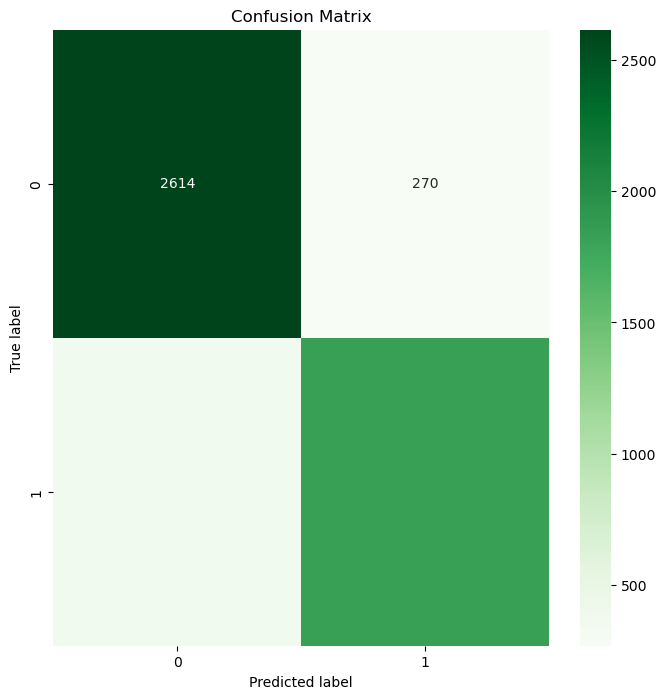

In [116]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [120]:
cm=confusion_matrix(y_test,prediction_lr)
cm

array([[2614,  270],
       [ 364, 1834]], dtype=int64)

In [117]:
from sklearn.neighbors import KNeighborsClassifier
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}
model_kn = KNeighborsClassifier(**params_kn)
model_kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=4, n_neighbors=10)

In [94]:
model_kn.score(X_test, y_test)

0.914207005116096

In [95]:
prediction_kn = model_kn.predict(X_test)
print(classification_report(y_test,prediction_kn))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2884
           1       0.95      0.85      0.90      2198

    accuracy                           0.91      5082
   macro avg       0.92      0.91      0.91      5082
weighted avg       0.92      0.91      0.91      5082



In [96]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
model_rf.score(X_test, y_test)

0.9559228650137741

In [98]:
prediction_rf = model_rf.predict(X_test)
print(classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2884
           1       0.95      0.94      0.95      2198

    accuracy                           0.96      5082
   macro avg       0.96      0.95      0.96      5082
weighted avg       0.96      0.96      0.96      5082



In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [108]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [101]:
scores = cross_val_score(model_rf, X_train, y_train, cv=kfold)

In [107]:
print(f"Average Accuracy: {scores.mean():.2f}")

Average Accuracy: 0.90


In [ ]:
scores = cross_val_score(model_kn, X_test, y_test, cv=kfold)

In [104]:
print(f"Average Accuracy: {scores.mean():.2f}")

Average Accuracy: 0.90
